# Descriptive Statistics on Beauty Features
---

In [1]:
import json 
with open('../sleeping_coeff/bcoefficients13358.json') as json_file: 
    data = json.load(json_file)

In [2]:
import pandas as pd
df = pd.DataFrame(data.values(), 
                  columns=['case_id', 'bcoefficient', 'publication_year', 'total_citations', 'max_citations_in_a_year', 'max_citation_year', 'awakening_time_year', 'sleep_time_years', 'time_from_awakening_to_peak_years'])
# time_from_awakening_to_peak_years = Number of years after publication to get to the year with maximum number of citations
df.bcoefficient = df.bcoefficient.astype(float)
for c in df.columns[2:]:
    df[c] = df[c].astype(int)

### Variables Dependency
- bcoefficient <- all
- sleep_time_years <- awakening_time_year - publication_year
- publication_year <- independent
- total_citations <- independent
- time_from_awakening_to_peak_years <- max_citation_year - awakening_time_year
- max_citation_year <- independent
- max_citations_in_a_year <- independent
- peak_year_relative_importance <- max_citations_in_a_year / total_citations (the closest to one the more important that year was)
- sleep_to_peak_ratio <- time_from_awakening_to_peak_years / sleep_time_years (ratio, if greater that one then it take more time for peak year than to be awakened, the closer to 0 the fastest)
- ? Increase ratio
- ? Decrease ratio
- ? Peak decade

In [3]:
df['peak_year_relative_importance'] = [x/y if y > 0 else 0 for x, y in zip(df['max_citations_in_a_year'], df['total_citations'])]
df['sleep_to_peak_ratio'] = [x/y if y > 0 else 0 for x, y in zip(df['time_from_awakening_to_peak_years'], df['sleep_time_years'])]

### Including Metadata

In [4]:
metadata = pd.read_csv('../datasets/all_cases_metadata.csv')
subjects = pd.read_csv('../datasets/subjects.csv')
df = df\
    .merge(metadata, how='left', left_on='case_id', right_on='source')\
    .merge(subjects, how='left', left_on='case_id', right_on='source')\
    .drop(columns=['ruling_type','ruling_content','source_x','source_y'])
df.case_time = [int(i.replace(i[-24:],''))  for i in df.case_time]
df.case_time = df.case_time/365

In [5]:
df.head()

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,year_document,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,subject
0,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,2000,2,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,Competition
1,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,2000,2,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,Agreements; decisions and concerted practices
2,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,2000,2,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,Free movement of goods
3,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,2000,2,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,Dominant position
4,61997CJ0147,0.0,2000,1,1,2000,2000,0,0,1.0,...,2000,2,1997.0,4.0,2.819178,1,1,Judgment of the Court of 10 February 2000.,Deutsche Post AG v Gesellschaft für Zahlungss...,Measures having equivalent effect


### Generate quick report

In [6]:
# import sweetviz as sv
# quick_report = sv.analyze(df)
# quick_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

---
# The total of citations

The beauty coefficient and the calculation of sleep time are dependent on citations, therefore we only account cases with at least one citation

In [7]:
#Accounting only cited cases
df = df[df.total_citations != 0]
df.describe()

,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,sleep_to_peak_ratio,main_subject,year_document,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases
count,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40208.000000,40196.000000,40196.000000,40208.000000,40208.000000,40208.000000
mean,47.776927,1999.766912,5.426582,1.857292,2004.195857,2003.238535,3.471623,0.957322,0.508913,0.308767,2.434167,1999.766912,6.779671,1998.204846,6.383496,1.590301,1.052079,0.098413
std,178.792541,12.884235,6.459925,1.409891,10.797324,10.832104,5.963201,0.611054,0.305737,0.497844,1.232995,12.884235,3.480908,12.755142,3.468176,0.746862,0.427409,0.297876
min,0.000000,1954.000000,1.000000,0.000000,1955.000000,1955.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1954.000000,1.000000,1954.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,1991.000000,2.000000,1.000000,1997.000000,1996.000000,0.000000,1.000000,0.272727,0.000000,1.000000,1991.000000,4.000000,1989.000000,3.000000,1.115068,1.000000,0.000000
50%,2.000000,2003.000000,3.000000,1.000000,2007.000000,2006.000000,1.000000,1.000000,0.466667,0.100000,2.000000,2003.000000,7.000000,2000.000000,6.000000,1.536986,1.000000,0.000000
75%,16.666667,2011.000000,7.000000,2.000000,2013.000000,2012.000000,4.000000,1.000000,0.666667,0.500000,3.000000,2011.000000,10.000000,2009.000000,9.000000,1.972603,1.000000,0.000000
max,4709.500000,2018.000000,118.000000,17.000000,2019.000000,2018.000000,55.000000,8.000000,1.000000,8.000000,7.000000,2018.000000,12.000000,2017.000000,12.000000,10.832877,17.000000,1.000000


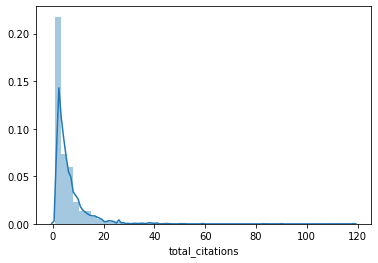

In [8]:
# Citations distribution
import seaborn as sns
sns.distplot(df.total_citations)

Left skewed distribution

### 1. How many citations is needed to be in the top 10%?

In [9]:
# What is the "number of citations"-value on which the top 10% citations will be above
value = df.total_citations.quantile(0.90)
value

12.0

In [10]:
df['top_cited'] = df.total_citations.apply(lambda x: (1 if x > value else 0))
df.top_cited.sum()

3697

### 2. How many citations in average a case has from the top 10%?

In [11]:
df[df.top_cited == 1].total_citations.mean()

20.714092507438462

---
# The sleep time

In [12]:
# Sleep time distribution
df.sleep_time_years.describe()

count    40208.000000
mean         3.471623
std          5.963201
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         55.000000
Name: sleep_time_years, dtype: float64

### 3. What is the average sleeping time?

A case sleeps 3.5 (6.22) years before is awakened in the whole set

In [13]:
df[df.top_cited == 1].sleep_time_years.describe()

count    3697.000000
mean        4.638626
std         6.364454
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max        36.000000
Name: sleep_time_years, dtype: float64

A case in the top 10% sleeps 4.3 (6.22) years before is awakened

### 4. Is there any relation between the sleeping time and the lenght of the case?

Negative correlation (-0.15640993138779785, 1.4540376113511156e-218)


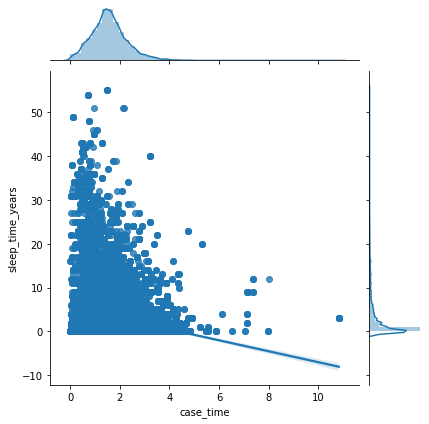

In [14]:
sub = df[['case_time','sleep_time_years','time_from_awakening_to_peak_years']]
#sns.pairplot(sub, corner=True, kind="reg")
from scipy import stats
print('Negative correlation',stats.pearsonr(sub.case_time, sub.sleep_time_years))
sns.jointplot("case_time", "sleep_time_years", data=sub, kind="reg")

*No there is not*

In [15]:
df.sort_values('case_time', ascending=False).head(2)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,subject,top_cited
34772,61989CJ0104(01),6.0,2000,3,1,2004,2003,3,1,0.333333,...,1,1989.0,3.0,10.832877,2,1,Judgment of the Court (Sixth Chamber) of 27 Ja...,J.M. Mulder; W.H. Brinkhoff; J.M.M. Muskens; ...,Agriculture and Fisheries,0
34771,61989CJ0104(01),6.0,2000,3,1,2004,2003,3,1,0.333333,...,1,1989.0,3.0,10.832877,2,1,Judgment of the Court (Sixth Chamber) of 27 Ja...,J.M. Mulder; W.H. Brinkhoff; J.M.M. Muskens; ...,Milk products,0


**The longest registered case took 10 years** https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594636644772&uri=CELEX:61989CJ0104(01)  

    Judgment of the Court (Sixth Chamber) of 27 January 2000. 
    J.M. Mulder, W.H. Brinkhoff, J.M.M. Muskens, T. Twijnstra and Otto Heinemann v Council of the European Union and Commission of the European Communities. 
    Additional levy on milk - Non-contractual liability - Reparation and assessment of damage. 
    Joined cases C-104/89 and C-37/90.

### 4. Is there a difference on the sleeping time between top cited cases and non-top cited cases?

In [16]:
number_top_cited = len(df[df.top_cited == 1])
df_non_top_sample = df[df.top_cited == 0].sample(n=number_top_cited, random_state=1273)
df_top_cited = df[df.top_cited ==1 ]

In [17]:
print('Average Sleeping time in years \n Non-Top cited cases: {} (SD {}) \n Top cited cases: {} (SD {})'.format(
    round(df_non_top_sample.sleep_time_years.mean(),2), round(df_non_top_sample.sleep_time_years.std(),2), 
    round(df_top_cited.sleep_time_years.mean(),2), round(df_top_cited.sleep_time_years.std(),2))) 

Average Sleeping time in years 
 Non-Top cited cases: 3.42 (SD 6.09) 
 Top cited cases: 4.64 (SD 6.36)


In [18]:
#T-test with different means, variance, and n: for Difference of Groups
# H0: μ1 - μ2 < d
stats.ttest_ind(df_non_top_sample.sleep_time_years, df_top_cited.sleep_time_years, equal_var = False)

Ttest_indResult(statistic=-8.407101629179149, pvalue=4.996156455536325e-17)

*Since p is less than 0.05 then H0 is rejected, therefore there is no evidence that the means of the two samples are equal*   
**Yes (there is an statistical difference but marginal, it is nevertheless unlikely that the sleeping time is a predictor of importance)**

### 5. Which are the cases with the longer sleep time?

In [19]:
df.sort_values(by='sleep_time_years', ascending =False).head(10)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,subject,top_cited
31981,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,...,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,Scrap equalisation,0
31982,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,...,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,ECSC matters,0
31983,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,...,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,Financial provisions ECSC,0
31984,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,...,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,Steel industry,0
20600,61960CJ0006,2965.0,1960,7,2,2015,2014,54,1,0.285714,...,12,1960.0,4.0,0.709589,1,0,Judgment of the Court of 16 December 1960.,Jean-E. Humblet v Belgian State.,Privileges and immunities,0
20601,61960CJ0006,2965.0,1960,7,2,2015,2014,54,1,0.285714,...,12,1960.0,4.0,0.709589,1,0,Judgment of the Court of 16 December 1960.,Jean-E. Humblet v Belgian State.,Staff regulations and employment conditions - EC,0
20602,61960CJ0006,2965.0,1960,7,2,2015,2014,54,1,0.285714,...,12,1960.0,4.0,0.709589,1,0,Judgment of the Court of 16 December 1960.,Jean-E. Humblet v Belgian State.,Privileges and immunities,0
20599,61960CJ0006,2965.0,1960,7,2,2015,2014,54,1,0.285714,...,12,1960.0,4.0,0.709589,1,0,Judgment of the Court of 16 December 1960.,Jean-E. Humblet v Belgian State.,Staff regulations and employment conditions - EC,0
20611,61963CJ0069,1326.0,1964,1,1,2016,2015,51,1,1.000000,...,6,1963.0,6.0,0.967123,1,0,Judgment of the Court (First Chamber) of 9 Jun...,Mrs Anne-Marie Marcillat (née Capitaine) v Co...,Staff regulations and employment conditions - EC,0
20622,61958CJ0003,1326.0,1960,1,1,2012,2011,51,1,1.000000,...,5,1958.0,3.0,2.156164,1,1,Judgment of the Court of 10 May 1960.,Barbara Erzbergbau AG and others v High Autho...,Transport,0


*The case with max sleep time is 55 years making a total of 12 citations after all*  
**Top lazy case:** https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594566429905&uri=CELEX:61956CJ0009

    Judgment of the Court of 13 June 1958. 
    Meroni & Co., Industrie Metallurgiche, SpA v High Authority of the European Coal and Steel Community. 
    Case 9-56.

### 6. What are the years with more awakenings?

In [20]:
df.groupby('awakening_time_year')\
    .count()['case_id']\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={'case_id':'cases'})\
    .head(15)

,awakening_time_year,cases
0,2012,2067
1,2016,2039
2,2015,2021
3,2013,1969
4,2014,1846
5,2011,1753
6,2005,1563
7,2010,1539
8,2008,1529
9,2006,1476


*The very last decade reports the most awakenings*

---
# The awakened years

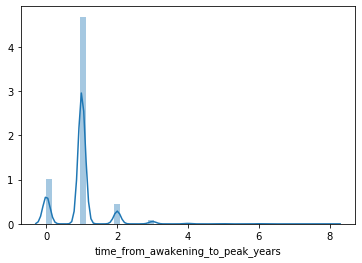

In [21]:
sns.distplot(df.time_from_awakening_to_peak_years, kde_kws={'bw':0.1})

### 7. What is the expected time in years to get to the most cited years after being awakened?

In [22]:
df.time_from_awakening_to_peak_years.describe()

count    40208.000000
mean         0.957322
std          0.611054
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: time_from_awakening_to_peak_years, dtype: float64

*Once a case is awakened within the first year will reach the point of highest number of citations per year.*

### 8. Is there a difference on the "speed to peak" in years between top cited cases and non-top cited cases?

In [23]:
print('Average Speed to peak in years \n Non-Top cited cases: {} (SD {}) \n Top cited cases: {} (SD {})'.format(
    round(df_non_top_sample.time_from_awakening_to_peak_years.mean(),2), round(df_non_top_sample.time_from_awakening_to_peak_years.std(),2), 
    round(df_top_cited.time_from_awakening_to_peak_years.mean(),2), round(df_top_cited.time_from_awakening_to_peak_years.std(),2))) 

Average Speed to peak in years 
 Non-Top cited cases: 0.9 (SD 0.51) 
 Top cited cases: 1.41 (SD 1.06)


In [24]:
#T-test with different means, variance, and n: for Difference of Groups
# H0: μ1 - μ2 < d
stats.ttest_ind(df_non_top_sample.time_from_awakening_to_peak_years, df_top_cited.time_from_awakening_to_peak_years, equal_var = False)

Ttest_indResult(statistic=-26.38835603172719, pvalue=2.577040890059685e-144)

*Since p is less than 0.05 then H0 is rejected, therefore there is no evidence that the means of the two samples are equal (the means are statistically different)*   
**Yes (an intuitive result - a case needs more time to accumulate high number of citations, potentially the rate of change is a predictor for importance)**

In [25]:
df.peak_year_relative_importance.describe()

count    40208.000000
mean         0.508913
std          0.305737
min          0.000000
25%          0.272727
50%          0.466667
75%          0.666667
max          1.000000
Name: peak_year_relative_importance, dtype: float64

### 9. What are the cases that received all their citations right after they were awakened?

In [26]:
df[df.peak_year_relative_importance==1].sort_values('total_citations',ascending=False).head(10)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,subject,top_cited
29386,62007CJ0161,30.0,2008,10,10,2011,2010,2,1,1.0,...,12,2007.0,3.0,1.753425,1,0,Judgment of the Court (First Chamber) of 22 De...,Commission of the European Communities v Repub...,Right of establishment,0
12202,62013CJ0616,0.0,2016,8,8,2017,2016,0,1,1.0,...,6,2013.0,11.0,2.534247,1,0,Judgment of the Court (Fifth Chamber) of 9 Jun...,Productos Asfálticos (PROAS); SA v European Co...,Competition,0
12204,62013CJ0608,0.0,2016,8,8,2017,2016,0,1,1.0,...,6,2013.0,11.0,2.539726,1,0,Judgment of the Court (Fifth Chamber) of 9 Jun...,Compañía Española de Petróleos (CEPSA); SA v E...,Agreements; decisions and concerted practices,0
12203,62013CJ0608,0.0,2016,8,8,2017,2016,0,1,1.0,...,6,2013.0,11.0,2.539726,1,0,Judgment of the Court (Fifth Chamber) of 9 Jun...,Compañía Española de Petróleos (CEPSA); SA v E...,Competition,0
12201,62013CJ0616,0.0,2016,8,8,2017,2016,0,1,1.0,...,6,2013.0,11.0,2.534247,1,0,Judgment of the Court (Fifth Chamber) of 9 Jun...,Productos Asfálticos (PROAS); SA v European Co...,Agreements; decisions and concerted practices,0
16839,62013CJ0531,0.0,2015,6,6,2016,2015,0,1,1.0,...,2,2013.0,10.0,1.345205,1,0,Judgment of the Court (Second Chamber) of 11 F...,Marktgemeinde Straßwalchen and Others v Bundes...,Environment,0
16840,62013CJ0531,0.0,2015,6,6,2016,2015,0,1,1.0,...,2,2013.0,10.0,1.345205,1,0,Judgment of the Court (Second Chamber) of 11 F...,Marktgemeinde Straßwalchen and Others v Bundes...,Approximation of laws,0
18596,61995CJ0247,18.0,1997,6,6,2000,1999,2,1,1.0,...,2,1995.0,7.0,1.561644,1,0,Judgment of the Court (Sixth Chamber) of 6 Feb...,Finanzamt Augsburg-Stadt v Marktgemeinde Weld...,Value added tax,0
18597,61995CJ0247,18.0,1997,6,6,2000,1999,2,1,1.0,...,2,1995.0,7.0,1.561644,1,0,Judgment of the Court (Sixth Chamber) of 6 Feb...,Finanzamt Augsburg-Stadt v Marktgemeinde Weld...,Taxation,0
16838,62013CJ0531,0.0,2015,6,6,2016,2015,0,1,1.0,...,2,2013.0,10.0,1.345205,1,0,Judgment of the Court (Second Chamber) of 11 F...,Marktgemeinde Straßwalchen and Others v Bundes...,Approximation of laws,0


Top case where all its citations came from the same year that was awakened: https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594568525510&uri=CELEX:62007CJ0161

    Judgment of the Court (First Chamber) of 22 December 2008.
    Commission of the European Communities v Republic of Austria.
    Failure of a Member State to fulfil obligations - Article 43 EC - National legislation laying down the conditions for registration of partnerships or companies on application by nationals of the new Member States - Procedure for certification of self-employed status.
    Case C-161/07.

**SLEEP-AWAKE-SLEEP record** Top case where all its citations came from the same year that was awakened with 13 YEARS of sleep: https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594568525510&uri=CELEX:62007CJ0161

    Judgment of the Court of 12 July 1984. 
    Grand Duchy of Luxembourg v Commission of the European Communities. 
    Clearance of EAGGF accounts. 
    Case 49/83.

### 10. What are the cases that took more time to get on the peak year than time spending on sleeping?

count    40208.000000
mean         0.308767
std          0.497844
min          0.000000
25%          0.000000
50%          0.100000
75%          0.500000
max          8.000000
Name: sleep_to_peak_ratio, dtype: float64


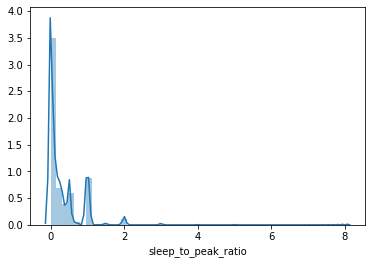

In [27]:
print(df.sleep_to_peak_ratio.describe())
sns.distplot(df.sleep_to_peak_ratio)

In [28]:
df[(df.sleep_to_peak_ratio > 1) & (df.sleep_time_years > 1)]\
    .sort_values('max_citations_in_a_year', ascending = False).head()

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,subject,top_cited
45027,61991CJ0267,132.400000,1993,44,6,2003,1995,2,8,0.136364,...,11,1991.0,10.0,2.109589,1,1,Judgment of the Court of 24 November 1993.,Criminal proceedings against Bernard Keck and...,Measures having equivalent effect,1
45028,61991CJ0267,132.400000,1993,44,6,2003,1995,2,8,0.136364,...,11,1991.0,10.0,2.109589,1,1,Judgment of the Court of 24 November 1993.,Criminal proceedings against Bernard Keck and...,Quantitative restrictions,1
45029,61991CJ0267,132.400000,1993,44,6,2003,1995,2,8,0.136364,...,11,1991.0,10.0,2.109589,1,1,Judgment of the Court of 24 November 1993.,Criminal proceedings against Bernard Keck and...,Free movement of goods,1
15734,61993CJ0384,60.833333,1995,21,4,2003,1998,3,5,0.190476,...,5,1993.0,8.0,1.758904,1,0,Judgment of the Court of 10 May 1995.,Alpine Investments BV v Minister van Financiën.,Freedom to provide services,1
19202,61996CJ0044,24.000000,1998,14,4,2003,2000,2,3,0.285714,...,1,1996.0,2.0,1.920548,1,0,Judgment of the Court of 15 January 1998.,Mannesmann Anlagenbau Austria AG and Others v...,Freedom to provide services,1


The case 62002CJ0189 took 4 times more to get to its peak year than the years spend on sleeping  
The top **"Slow awaking"** https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594587635977&uri=CELEX:61991CJ0267

    Judgment of the Court of 24 November 1993. 
    Criminal proceedings against Bernard Keck and Daniel Mithouard. 
    References for a preliminary ruling: Tribunal de grande instance de Strasbourg - France. 
    Free movement of goods - Prohibition of resale at a loss. 
    Joined cases C-267/91 and C-268/91.

---
## The beauty coefficcient

In [29]:
print(df.bcoefficient.describe())

count    40208.000000
mean        47.776927
std        178.792541
min          0.000000
25%          0.000000
50%          2.000000
75%         16.666667
max       4709.500000
Name: bcoefficient, dtype: float64


### 11. What are the top sleeping beauties in case law (highest beauty coefficient)?

In [30]:
# top 5% with at least 1 citation
top5p = df.bcoefficient.quantile(0.95)
top5p

265.0

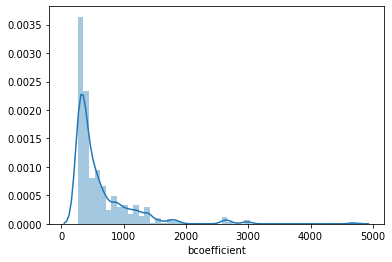

In [31]:
sns.distplot(df[df.bcoefficient > top5p].bcoefficient)

In [32]:
df[df.bcoefficient > top5p]\
    .sort_values(by=['bcoefficient'], ascending=False)\
    .reset_index(drop=True).head(10)

,case_id,bcoefficient,publication_year,total_citations,max_citations_in_a_year,max_citation_year,awakening_time_year,sleep_time_years,time_from_awakening_to_peak_years,peak_year_relative_importance,...,month_document,year_lodge,month_lodge,case_time,n_countries,joined_cases,ruling_title,ruling_name,subject,top_cited
0,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,...,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,Financial provisions ECSC,0
1,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,...,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,Scrap equalisation,0
2,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,...,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,ECSC matters,0
3,61956CJ0009,4709.5,1958,12,3,2015,2013,55,2,0.250000,...,6,1956.0,12.0,1.495890,1,0,Judgment of the Court of 13 June 1958.,Meroni &amp; Co.; Industrie Metallurgiche; Sp...,Steel industry,0
4,61974CJ0002,4632.0,1974,27,8,2011,2008,34,3,0.296296,...,6,1974.0,1.0,0.446575,1,0,Judgment of the Court of 21 June 1974.,Jean Reyners v Belgian State.,Right of establishment,1
5,61970CJ0022,2984.0,1971,37,7,2002,2001,30,1,0.189189,...,3,1970.0,5.0,0.865753,1,0,Judgment of the Court of 31 March 1971.,Commission of the European Communities v Coun...,Provisions governing the Institutions,1
6,61970CJ0022,2984.0,1971,37,7,2002,2001,30,1,0.189189,...,3,1970.0,5.0,0.865753,1,0,Judgment of the Court of 31 March 1971.,Commission of the European Communities v Coun...,External relations,1
7,61970CJ0022,2984.0,1971,37,7,2002,2001,30,1,0.189189,...,3,1970.0,5.0,0.865753,1,0,Judgment of the Court of 31 March 1971.,Commission of the European Communities v Coun...,Transport,1
8,61970CJ0022,2984.0,1971,37,7,2002,2001,30,1,0.189189,...,3,1970.0,5.0,0.865753,1,0,Judgment of the Court of 31 March 1971.,Commission of the European Communities v Coun...,Provisions governing the Institutions,1
9,61970CJ0022,2984.0,1971,37,7,2002,2001,30,1,0.189189,...,3,1970.0,5.0,0.865753,1,0,Judgment of the Court of 31 March 1971.,Commission of the European Communities v Coun...,Transport,1


Top sleeping beauty in case law, 61956CJ0009 is also the lazy case analysed on sleeping time years.  
The second sleeping beauty is a case that slept 34 years related to Right of establishment. https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594628405132&uri=CELEX:61974CJ0002

    Judgment of the Court of 21 June 1974. 
    Jean Reyners v Belgian State. 
    Reference for a preliminary ruling: Conseil d'Etat - Belgium. 
    Right of establishment. 
    Case 2-74.

The top **Non-popular sleeping beauty** is https://eur-lex.europa.eu/legal-content/EN/TXT/?qid=1594628296212&uri=CELEX:61960CJ0006

    Judgment of the Court of 16 December 1960. 
    Jean-E. Humblet v Belgian State. 
    Case 6/60.

### 12.Are the oldest cases getting more chances to be sleeping beauties?

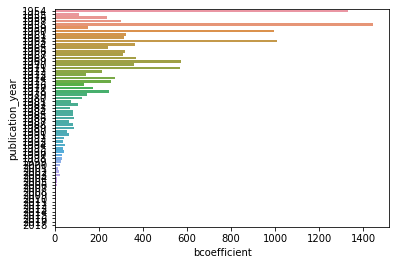

In [33]:
bcoeff_agg = df.groupby('publication_year').mean()['bcoefficient'].reset_index()
sns.barplot(x="bcoefficient", y="publication_year", data=bcoeff_agg, orient="h")

Yes, the sleeping coefficient is a dependent of sleeping years and logically the older the cases the more chances get to sleep  
This means that is only fair to compare beauty coefficient with cases of their own cohort

### 13.Are the top cited cases getting more chances to be sleeping beauties?

In [34]:
print(df_non_top_sample.bcoefficient.mean(), df_top_cited.bcoefficient.mean())
stats.ttest_ind(df_non_top_sample.bcoefficient, df_top_cited.bcoefficient, equal_var = False)

41.05811017942476 127.94811564776434


Ttest_indResult(statistic=-14.110048227598728, pvalue=2.0750628235589748e-44)

Yes, they naturally are since beauty coefficient is dependent on number of citations

### 14.Are sleeping beauties more prevalent in certain subjects of law?

Taking the subjects top 20 

In [35]:
subjects = df.groupby('subject')\
    .count()['case_id']\
    .sort_values(ascending=False)\
    .reset_index()\
    .rename(columns={'case_id':'cases_count'})\
    .head(20) #all these subjects are above 2% of the total of cases

l1, l2, l3 = [], [], []
for s in list(subjects.subject):
    l1.append(df[df.subject == s].bcoefficient.mean())
    l2.append(df[df.subject == s].bcoefficient.std())
    l3.append(df[(df.subject == s) & (df.bcoefficient > top5p)].count()['bcoefficient'])

subjects['bcoefficient_mean'] = l1
subjects['bcoefficient_std'] = l2
subjects['beauty_count'] = l3
subjects['beauty_percentage'] = subjects['beauty_count']/subjects['cases_count']*100

In [36]:
subjects.sort_values('beauty_count', ascending = False)

,subject,cases_count,bcoefficient_mean,bcoefficient_std,beauty_count,beauty_percentage
3,Agriculture and Fisheries,2123,80.669061,228.889246,200,9.420631
4,Free movement of goods,2059,68.605747,189.488492,162,7.867897
5,Competition,1556,65.071161,186.464135,127,8.161954
12,Customs Union,906,84.123804,226.375815,97,10.706402
6,Taxation,1391,42.744848,141.824903,81,5.823149
7,Quantitative restrictions,1095,60.531872,163.117977,73,6.666667
14,Agreements; decisions and concerted practices,751,62.865414,175.300542,60,7.989348
8,External relations,1021,62.092001,262.731842,55,5.386876
19,State aids,629,63.656121,177.113565,53,8.426073
0,Approximation of laws,3145,21.779715,88.959545,52,1.653418


**Yes**  
Customs Union the highest beauty score and the highest percentage of beauties  
Agriculture and Fisheries the highest number of beauties  
Approximation of laws has the highest number of cases but only 2% of sleeping beauties